In [ ]:

!pip install datasets

from datasets import load_dataset

dataset = load_dataset("AdamCodd/emotion-balanced")

dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.06k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/1.97M [00:00<?, ?B/s]

validation.jsonl:   0%|          | 0.00/248k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/244k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
!pip install datasets transformers torch pandas numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Convert to pandas DataFrames for EDA
train_df = pd.DataFrame(dataset['train'])
valid_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

In [ ]:
# Define label mapping
label_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

In [ ]:
# Add text label column for verification
for df in [train_df, valid_df, test_df]:
    df['emotion'] = df['label'].map(label_map)

In [ ]:
# Check class distribution
print("Train Class Distribution:")
print(train_df['emotion'].value_counts())
print("\nValidation Class Distribution:")
print(valid_df['emotion'].value_counts())
print("\nTest Class Distribution:")
print(test_df['emotion'].value_counts())

Train Class Distribution:
emotion
anger       2667
love        2667
fear        2667
sadness     2667
joy         2666
surprise    2666
Name: count, dtype: int64

Validation Class Distribution:
emotion
surprise    334
anger       334
joy         333
fear        333
sadness     333
love        333
Name: count, dtype: int64

Test Class Distribution:
emotion
joy         334
fear        334
anger       333
surprise    333
love        333
sadness     333
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the data for logistic regression
X_train = train_df['text']
y_train = train_df['label']
X_valid = valid_df['text']
y_valid = valid_df['label']

# Use TF-IDF to vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

# Train a logistic regression model
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
logreg_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = logreg_model.predict(X_valid_vec)

# Evaluate the model
print(classification_report(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       333
           1       0.88      0.86      0.87       333
           2       0.89      0.94      0.91       333
           3       0.90      0.90      0.90       334
           4       0.89      0.84      0.86       333
           5       0.89      0.96      0.92       334

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



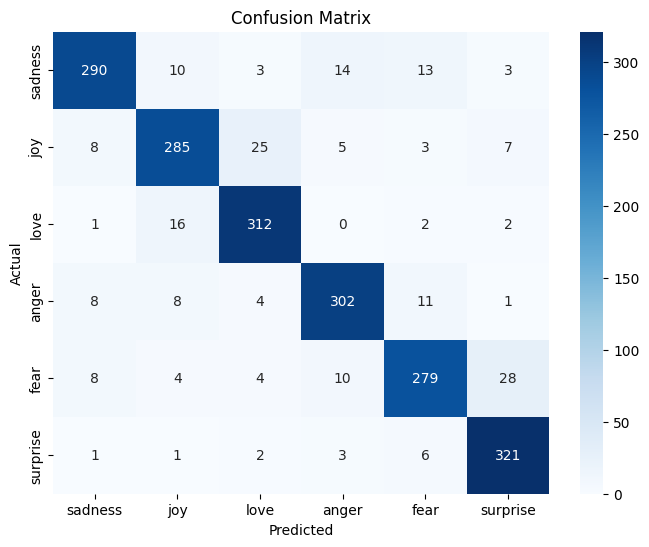

ROC AUC Score (macro-averaged): 0.9807318526000129


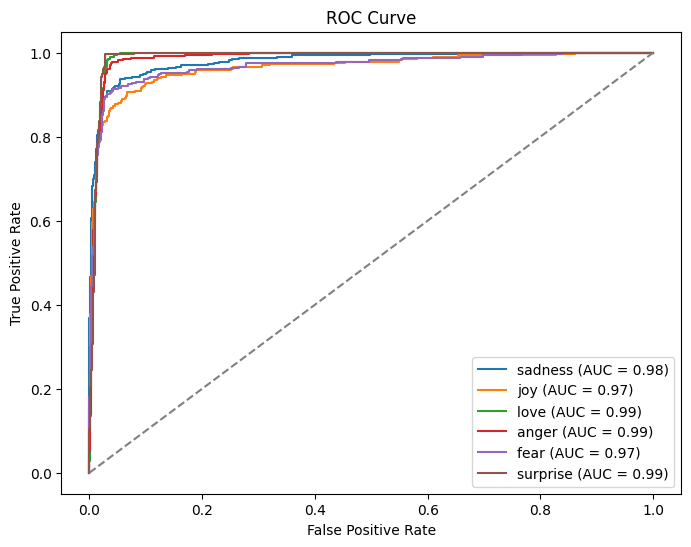

In [ ]:

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_valid and y_pred are already defined from the previous code

# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC AUC Score and Curve (requires probability predictions)
y_prob = logreg_model.predict_proba(X_valid_vec)

# ROC AUC Score for each class (macro-averaged)
roc_auc = roc_auc_score(y_valid, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score (macro-averaged): {roc_auc}")

# ROC curve for each class (optional - can be computationally intensive)
plt.figure(figsize=(8,6))
for i in range(len(label_map)):
  fpr, tpr, _ = roc_curve(np.array(pd.get_dummies(y_valid))[:, i], y_prob[:,i])
  plt.plot(fpr, tpr, label=f'{label_map[i]} (AUC = {roc_auc_score(np.array(pd.get_dummies(y_valid))[:, i], y_prob[:,i]):.2f})')

plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Preprocessing for Traditional ML Models (TF-IDF)
def prepare_tfidf_features(train_texts, test_texts):
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train = vectorizer.fit_transform(train_texts)
    X_test = vectorizer.transform(test_texts)
    return X_train, X_test, vectorizer

In [ ]:
# Prepare TF-IDF features
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = prepare_tfidf_features(
    train_df['text'], test_df['text']
)

In [ ]:
# Save TF-IDF features for later use
np.savez('tfidf_features.npz',
         X_train=X_train_tfidf,
         X_test=X_test_tfidf,
         y_train=train_df['label'],
         y_test=test_df['label'])

In [ ]:
# Preprocessing for Deep Learning Models (BERT)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

In [ ]:
# Tokenize all splits
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Set format for PyTorch
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
# Create DataLoaders
batch_size = 32

train_loader = DataLoader(
    tokenized_datasets['train'],
    shuffle=True,
    batch_size=batch_size
)

valid_loader = DataLoader(
    tokenized_datasets['validation'],
    batch_size=batch_size
)

test_loader = DataLoader(
    tokenized_datasets['test'],
    batch_size=batch_size
)


In [ ]:
# Custom Dataset Class for future use
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label)
        }


In [ ]:
# Example usage of custom dataset
train_dataset = EmotionDataset(
    train_df['text'].values,
    train_df['label'].values,
    tokenizer,
    max_length=128
)


In [ ]:
# Save processed data for later use
torch.save(tokenized_datasets, 'tokenized_datasets.pt')
torch.save(train_loader, 'train_loader.pt')
torch.save(valid_loader, 'valid_loader.pt')
torch.save(test_loader, 'test_loader.pt')

print("Preprocessing completed successfully!")

Preprocessing completed successfully!


In [ ]:


# Label mapping
label_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
for df in [train_df, valid_df, test_df]:
    df['emotion'] = df['label'].map(label_map)

# Display dataset info
print("Training set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))

Training set size: 16000
Validation set size: 2000
Test set size: 2000


In [ ]:
# TF-IDF Vectorization for Traditional ML Models
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_df['text'])
X_test_tfidf = tfidf.transform(test_df['text'])

# BERT Tokenization for Deep Learning Models
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
valid_encodings = tokenizer(valid_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

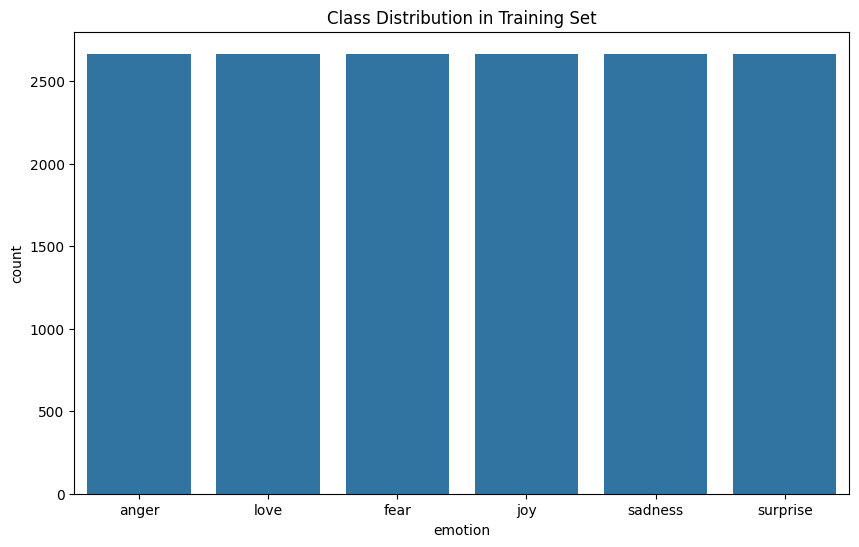

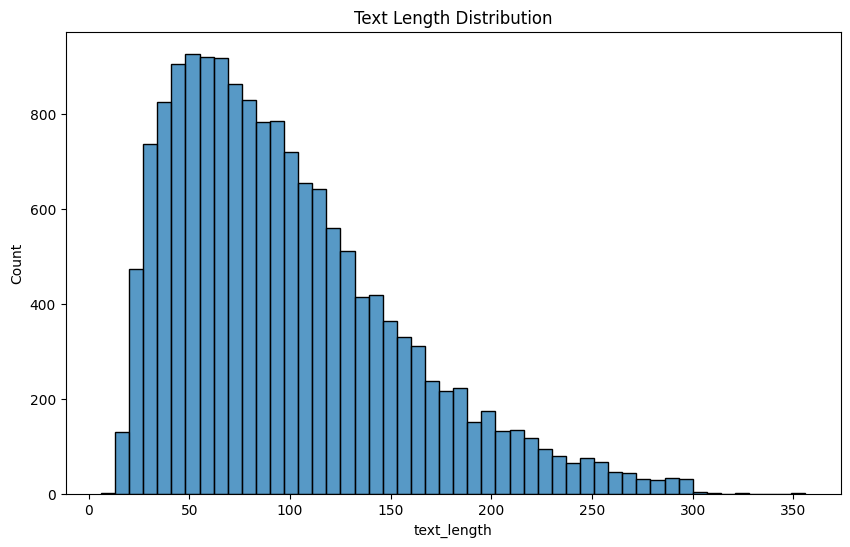

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=train_df)
plt.title('Class Distribution in Training Set')
plt.show()

# Text Length Analysis
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.show()

In [ ]:
# Traditional ML Models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train_df['label'])
svm_preds = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(test_df['label'], svm_preds))
print(classification_report(test_df['label'], svm_preds, target_names=label_map.values()))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_df['label'])
nb_preds = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(test_df['label'], nb_preds))
print(classification_report(test_df['label'], nb_preds, target_names=label_map.values()))



SVM Accuracy: 0.901
              precision    recall  f1-score   support

     sadness       0.94      0.88      0.91       333
         joy       0.92      0.85      0.89       334
        love       0.89      0.98      0.93       333
       anger       0.92      0.87      0.89       333
        fear       0.86      0.86      0.86       334
    surprise       0.88      0.97      0.92       333

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

Naive Bayes Accuracy: 0.847
              precision    recall  f1-score   support

     sadness       0.88      0.86      0.87       333
         joy       0.87      0.76      0.81       334
        love       0.83      0.90      0.87       333
       anger       0.87      0.82      0.85       333
        fear       0.82      0.81      0.82       334
    surprise       0.82      0.91      0.86       333

    accuracy                 

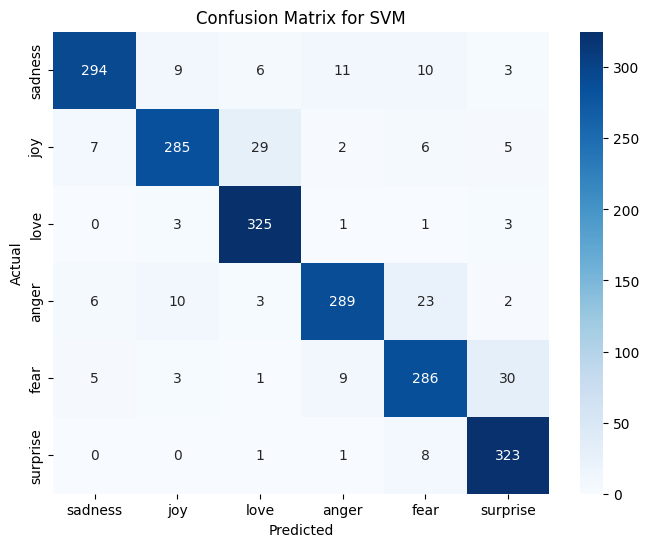

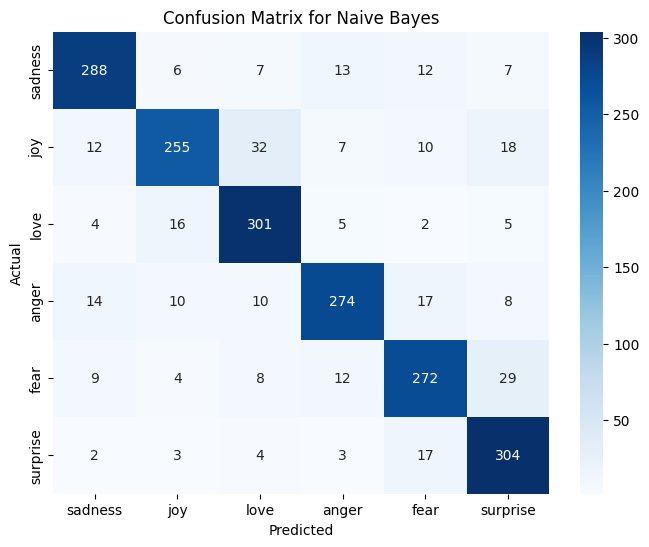

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix for SVM
cm_svm = confusion_matrix(test_df['label'], svm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(test_df['label'], nb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


SVM ROC AUC Score (macro-averaged): 0.9878329961890756


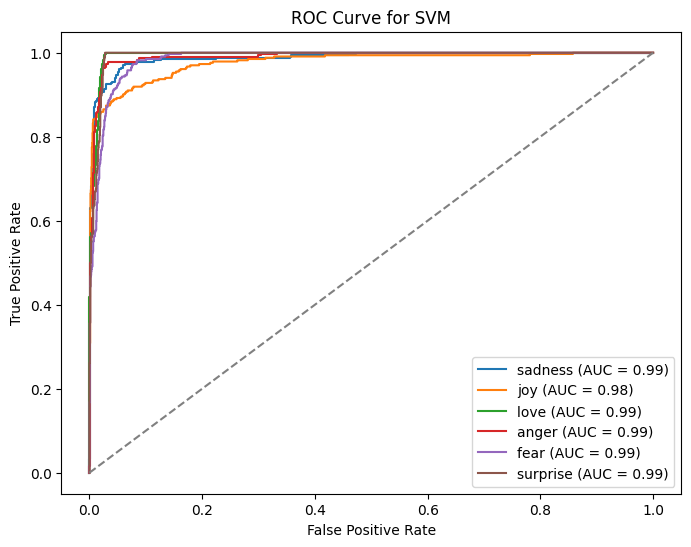

Naive Bayes ROC AUC Score (macro-averaged): 0.9766388779172672


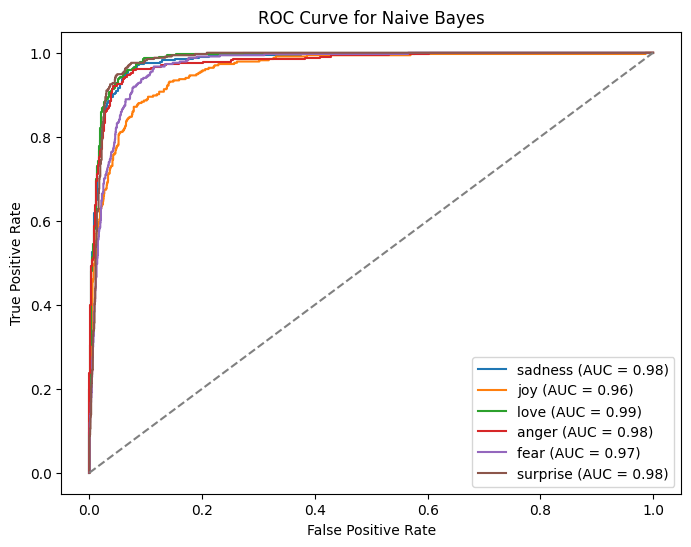

In [ ]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# ROC AUC Curve for SVM (using decision function and manually calculating probabilities)
svm_probs = svm_model.decision_function(X_test_tfidf)
# If using a kernel that supports probability=True, use this instead:
#svm_probs = svm_model.predict_proba(X_test_tfidf)
# For a linear kernel, we need to calculate probabilities manually
from scipy.special import softmax # Import softmax
svm_probs = softmax(svm_probs, axis=1) # Apply softmax to get probabilities

roc_auc_svm = roc_auc_score(test_df['label'], svm_probs, multi_class='ovr', average='macro')
print(f"SVM ROC AUC Score (macro-averaged): {roc_auc_svm}")

plt.figure(figsize=(8,6))
for i in range(len(label_map)):
    fpr, tpr, _ = roc_curve(np.array(pd.get_dummies(test_df['label']))[:, i], svm_probs[:,i])
    plt.plot(fpr, tpr, label=f'{label_map[i]} (AUC = {roc_auc_score(np.array(pd.get_dummies(test_df["label"]))[:, i], svm_probs[:,i]):.2f})')

plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

# ROC AUC Curve for Naive Bayes
nb_probs = nb_model.predict_proba(X_test_tfidf)
roc_auc_nb = roc_auc_score(test_df['label'], nb_probs, multi_class='ovr', average='macro')
print(f"Naive Bayes ROC AUC Score (macro-averaged): {roc_auc_nb}")

plt.figure(figsize=(8,6))
for i in range(len(label_map)):
    fpr, tpr, _ = roc_curve(np.array(pd.get_dummies(test_df['label']))[:, i], nb_probs[:,i])
    plt.plot(fpr, tpr, label=f'{label_map[i]} (AUC = {roc_auc_score(np.array(pd.get_dummies(test_df["label"]))[:, i], nb_probs[:,i]):.2f})')

plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

In [ ]:
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transformers-4.51.1:
      Successfully uninstalled transformers-4.51.1


In [ ]:
# Preprocessing for Deep Learning Models (BERT)

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer # Import TrainingArguments
import torch

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')  # Using DistilBERT


def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

# Tokenize all splits
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
valid_encodings = tokenizer(valid_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert encodings to PyTorch datasets
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Removed .to(self.device)
        item['labels'] = torch.tensor(self.labels[idx])  # Removed .to(self.device)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, train_df['label'].tolist())
valid_dataset = EmotionDataset(valid_encodings, valid_df['label'].tolist())

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

# Load pre-trained BERT model with a smaller architecture
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6).to(device)

# Define Trainer with optimized parameters
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,  # Further reduced batch size
    num_train_epochs=1,  # Reduced epochs
    weight_decay=0.01,
    fp16=True,
    gradient_accumulation_steps=4,  # Increased accumulation steps
    report_to="none",  # Disable wandb reporting
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

# Fine-tune BERT
trainer.train()

print("Fine-tuning completed!")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Using GPU: Tesla T4


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.267700,0.230220


Fine-tuning completed!


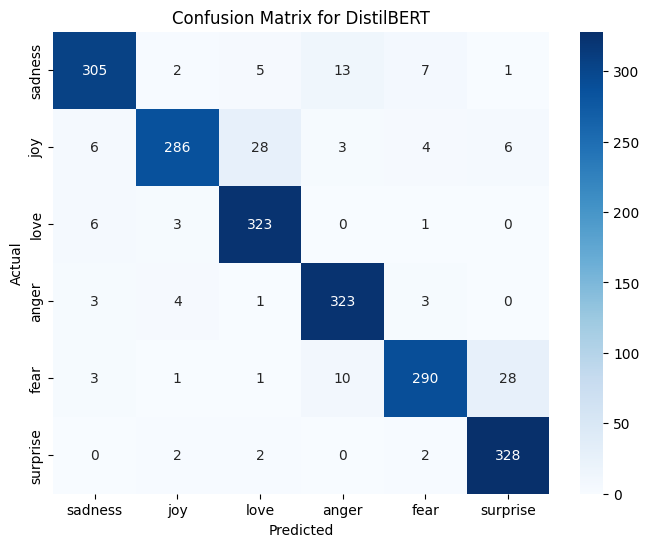

DistilBERT ROC AUC Score (macro-averaged): 0.9933219117868276


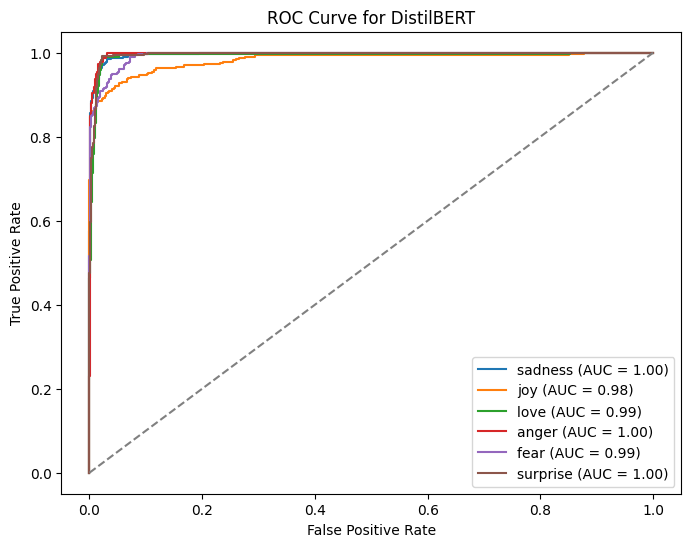

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
from scipy.special import softmax



# Predictions from the fine-tuned model (replace with actual predictions)
predictions = trainer.predict(valid_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Confusion Matrix for DistilBERT
cm_distilbert = confusion_matrix(valid_df['label'], predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_distilbert, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for DistilBERT")
plt.show()


# ROC AUC Curve for DistilBERT
distilbert_probs = softmax(predictions.predictions, axis=1) # Apply softmax
roc_auc_distilbert = roc_auc_score(valid_df['label'], distilbert_probs, multi_class='ovr', average='macro')
print(f"DistilBERT ROC AUC Score (macro-averaged): {roc_auc_distilbert}")

plt.figure(figsize=(8,6))
for i in range(len(label_map)):
    fpr, tpr, _ = roc_curve(np.array(pd.get_dummies(valid_df['label']))[:, i], distilbert_probs[:,i])
    plt.plot(fpr, tpr, label=f'{label_map[i]} (AUC = {roc_auc_score(np.array(pd.get_dummies(valid_df["label"]))[:, i], distilbert_probs[:,i]):.2f})')

plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DistilBERT')
plt.legend()
plt.show()


In [ ]:

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming predicted_labels and valid_df['label'] are defined as in the previous code

# Calculate metrics
accuracy = accuracy_score(valid_df['label'], predicted_labels)
f1 = f1_score(valid_df['label'], predicted_labels, average='weighted')  # Use weighted average for multi-class
recall = recall_score(valid_df['label'], predicted_labels, average='weighted')
precision = precision_score(valid_df['label'], predicted_labels, average='weighted')

# Print the results
print(f"DistilBERT Accuracy: {accuracy}")
print(f"DistilBERT F1 Score: {f1}")
print(f"DistilBERT Recall: {recall}")
print(f"DistilBERT Precision: {precision}")


DistilBERT Accuracy: 0.9275
DistilBERT F1 Score: 0.9269845849946751
DistilBERT Recall: 0.9275
DistilBERT Precision: 0.9291411054160432


Accuracy: 0.9275
Precision: 0.9291
Recall: 0.9275
F1 Score: 0.9270


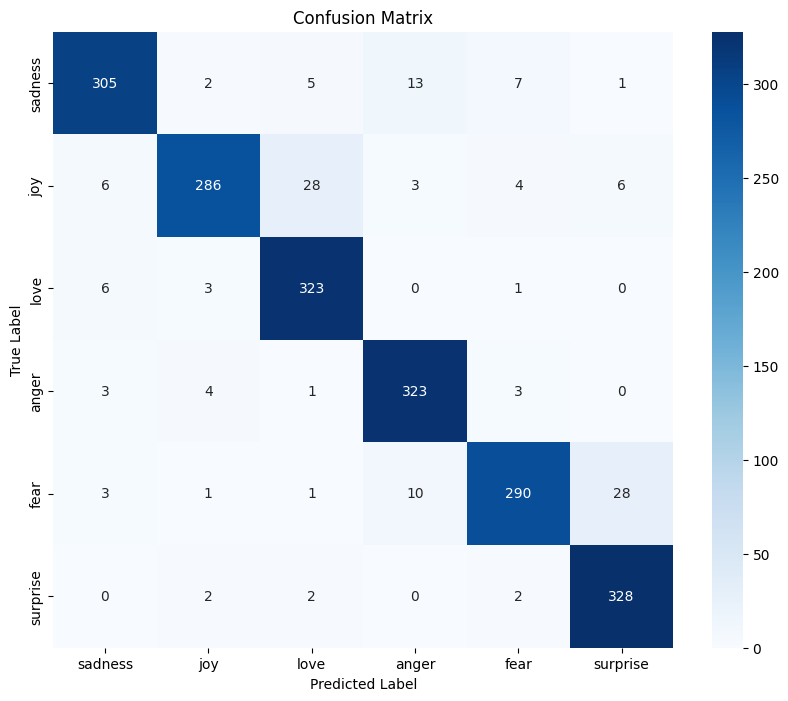

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the validation set
predictions = trainer.predict(valid_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import torch
import numpy as np

def predict_emotion(text, model, tokenizer, label_map):
    """Predicts the emotion of a given text using the fine-tuned BERT model.

    Args:
        text (str): The input text.
        model: The fine-tuned BERT model.
        tokenizer: The tokenizer used for the model.
        label_map (dict): A dictionary mapping label indices to emotion names.

    Returns:
        str: The predicted emotion.
    """
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Move inputs to the device (GPU if available, otherwise CPU)
    device = next(model.parameters()).device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)
        predicted_class_id = np.argmax(outputs.logits.cpu().numpy()).flatten().item()

    # Get emotion label
    predicted_emotion = label_map[predicted_class_id]

    return predicted_emotion

# Get user input
user_input = input("Enter text: ")

# Predict emotion
predicted_emotion = predict_emotion(user_input, model, tokenizer, label_map)

# Print the prediction
print(f"Predicted Emotion: {predicted_emotion}")

Enter text: i am going for lunch
Predicted Emotion: anger
